## Exploratory Data Analysis.  
### This notebook can be used to visualize and understand the data a bit better.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Load the data
yellow = pd.read_parquet('../data/raw_data/yellow.parquet')

# Load the location lookup table
location_lookup = pd.read_csv('../data/misc/taxi_zone_lookup.csv', index_col='LocationID')

In [3]:
print("Shape of the yellow taxi data: ", yellow.shape, '\n')

print("These are the columns of the yellow taxi data:\n")
# Adjust the number of columns per line
cols_per_line = 3
col = ""

for i, c in enumerate(yellow.columns, start=1):
    col += f"{c:<30}"  # Left-align each column and ensure a fixed width (30 in this case)
    if i % cols_per_line == 0:  # Print after every 3 columns
        print(col)
        col = ""
print(col)  # Print the remaining columns


Shape of the yellow taxi data:  (61719218, 20) 

These are the columns of the yellow taxi data:

VendorID                      tpep_pickup_datetime          tpep_dropoff_datetime         
passenger_count               trip_distance                 RatecodeID                    
store_and_fwd_flag            PULocationID                  DOLocationID                  
payment_type                  fare_amount                   extra                         
mta_tax                       tip_amount                    tolls_amount                  
improvement_surcharge         total_amount                  congestion_surcharge          
Airport_fee                   airport_fee                   


In [4]:
# Investigate the DOLocationID column

missing_ids = set(range(1, 266)) - set(yellow['DOLocationID'].unique())
print("\nThese are the missing DOLocationIDs:")
print(missing_ids)

# So there are no drop off occurances at location ids 104, 199, and 103.


These are the missing DOLocationIDs:
{104, 199, 103}


# Pretty Picture

In [5]:
# Load in the shapefile
zones = gpd.read_file('../data/taxi_zones/taxi_zones.shp')
zones = zones.to_crs(epsg=4326)

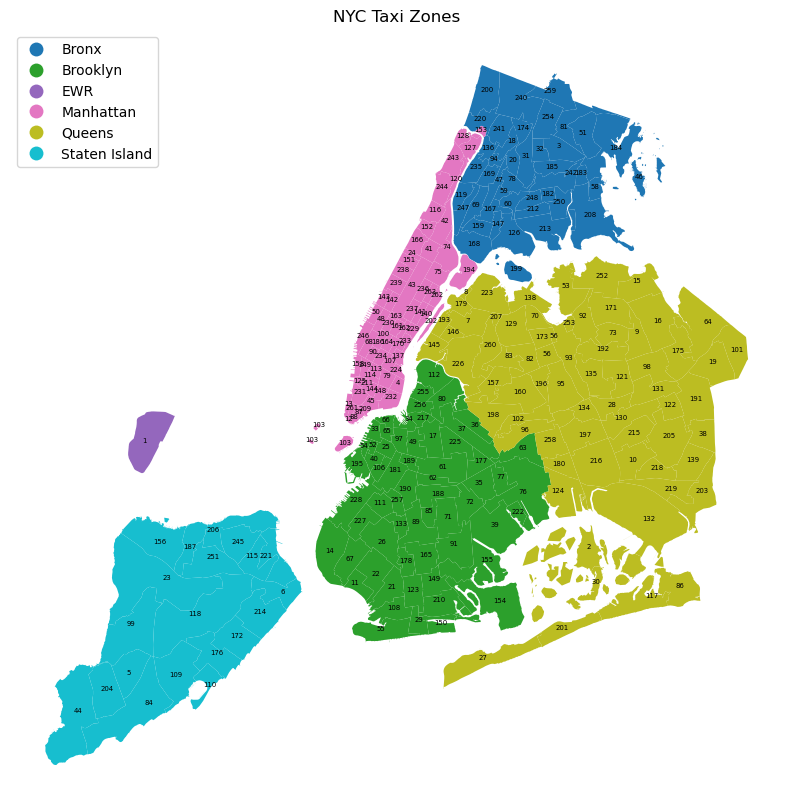

In [6]:
# Plot the shapefile
zones['borough'] = zones['borough'].str.replace('Other', 'Staten Island')
zones.plot(column='borough', figsize=(10, 10), legend=True, legend_kwds={'loc': 'upper left'})  # Plot the zones

# Label each zone with the LocationID
zones['coords'] = zones['geometry'].apply(lambda x: x.representative_point().coords[:])  # Get the coordinates of the zones
zones['coords'] = [coords[0] for coords in zones['coords']]  # Extract the coordinates from the list
for idx, row in zones.iterrows():
    plt.annotate(text=str(row['LocationID']), xy=row['coords'], horizontalalignment='center', fontsize=5)  # Annotate the zones with the LocationID

plt.title('NYC Taxi Zones')
plt.axis('off')  # Turn off the axis

plt.show()

